# Linear Algebra Project

In [90]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import pylab

%matplotlib inline

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

In [145]:
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
data = pd.read_csv('data/Iris.csv', sep=',', index_col=None, names=names, skiprows=1)
data.index = np.arange(0,len(data))

In [231]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [84]:
iris = {
    'Iris-setosa'     : 1, 
    'Iris-versicolor' : 2, 
    'Iris-virginica'  : 3 
}

In [85]:
data['class'] = data['class'].replace(iris)

In [86]:
tsne = TSNE(n_components=2, perplexity=5)

points = tsne.fit_transform(data.iloc[:,:-1])

    t-SNE algorithm

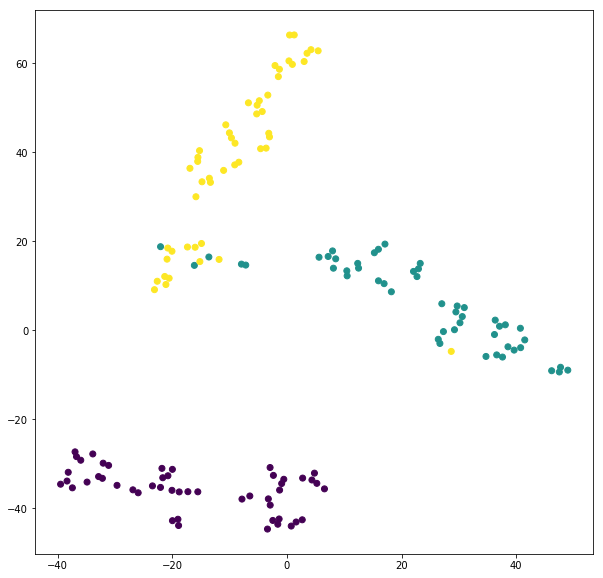

In [89]:
fig = plt.figure(figsize=(10,10))
plt.scatter(y = points[:, 0], x =  points[:, 1], c = data['class'])
plt.show()

    PCA algorithm

In [229]:
pca = PCA(n_components=2)
ppoints = pca.fit_transform(data.iloc[:,:-1])

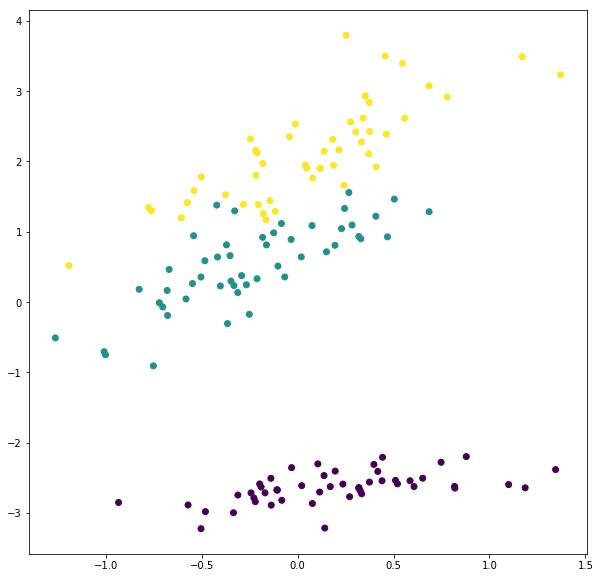

In [92]:
fig = plt.figure(figsize=(10,10))
plt.scatter(y = ppoints[:, 0], x =  ppoints[:, 1], c = data['class'])
plt.show()

In [181]:
cols = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation",
"relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
                   header = None, names = cols, sep = ",")

In [182]:
for col in data.columns[data.dtypes == object]:
    data[col] = data[col].str.strip()

In [183]:
# ignore NumPy warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

for col in [c for c in data.columns if '?' in data[c].unique()]:
    m = data[col].mode()[0]
    print(m)
    data[col] = data[col].replace(to_replace = '?', value = m)
    

Private
Prof-specialty
United-States


In [188]:
del data['fnlwgt']

In [191]:
inc = {'<=50K' : 0, '>50K' : 1}

data['income'] = data['income'].replace(inc)

In [199]:
df = pd.get_dummies(data)

In [224]:
temp = df.loc[:, df.columns != 'income']

In [225]:
cpoints = tsne.fit_transform(temp)

In [2]:
df['sex'].unique()

NameError: name 'df' is not defined

In [1]:
fig = plt.figure(figsize=(12,12))
plt.scatter(x = cpoints[:, 0], y =  cpoints[:, 1], c = df['sex'].repla)
plt.show()

NameError: name 'plt' is not defined

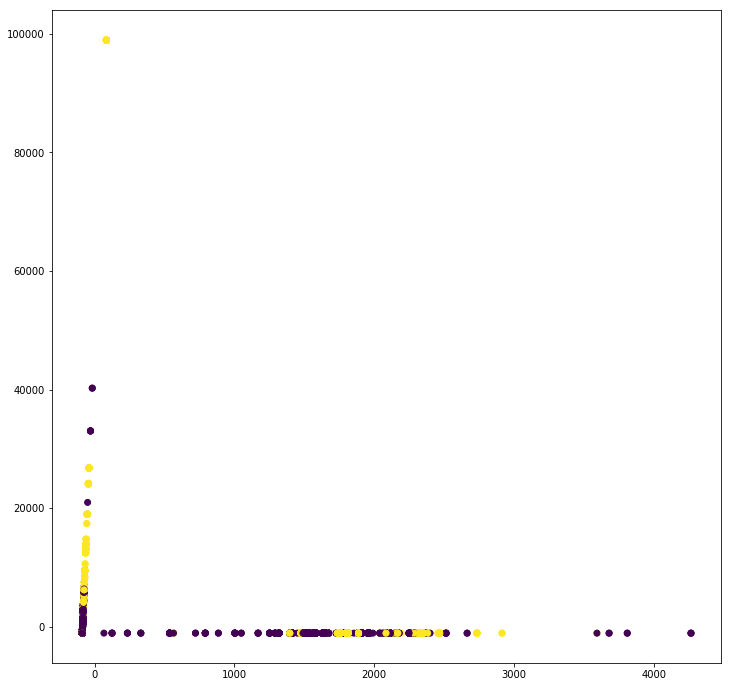

In [230]:
cppoints = pca.fit_transform(temp)

fig = plt.figure(figsize=(12,12))
plt.scatter(y = cppoints[:, 0], x =  cppoints[:, 1], c = df['income'])
plt.show()

In [235]:
df['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64